# **Transfer learning in image classification**

In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Make predictions using ready made model (without any training)

In [5]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

classifier_model = mobilenet_v2

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE + (3,))
])

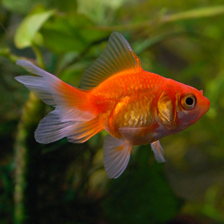

In [6]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [9]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 3s 3s/step


array([[ 0.22101447,  2.047492  ,  9.622561  , ..., -1.4621571 ,
        -0.28146517, -0.25984728]], dtype=float32)

In [10]:
result.shape

(1, 1001)

In [11]:
predicted_index_label = np.argmax(result)
predicted_index_label

2

In [12]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_labels[predicted_index_label]

'goldfish'

### Load flowers dataset

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 11s 0us/step


In [15]:
data_dir

'./datasets/flower_photos'

In [16]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/1265350143_6e2b276ec9.jpg'),
 PosixPath('datasets/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8718637649_87a0d85190_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2538504987_fe524b92a8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4278442064_a5a598524b_m.jpg')]

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3997609936_8db20b7141_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2550860627_998a4fc4c1.jpg')]

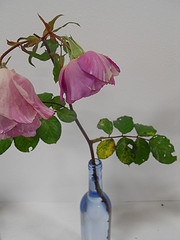

In [20]:
Image.open(str(roses[0]))

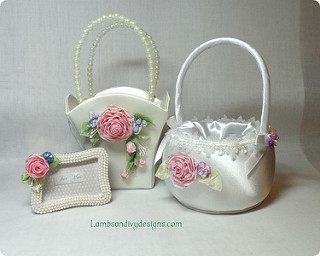

In [21]:
Image.open(str(roses[5]))

In [22]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/5719416820_3060e3c1f0.jpg'),
 PosixPath('datasets/flower_photos/tulips/16986144192_55e0e6c152.jpg'),
 PosixPath('datasets/flower_photos/tulips/8668974855_8389ecbdca_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/4561670472_0451888e32_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14266093711_66d18a1e44_n.jpg')]

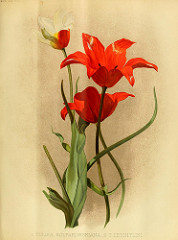

In [23]:
Image.open(str(tulips[5]))

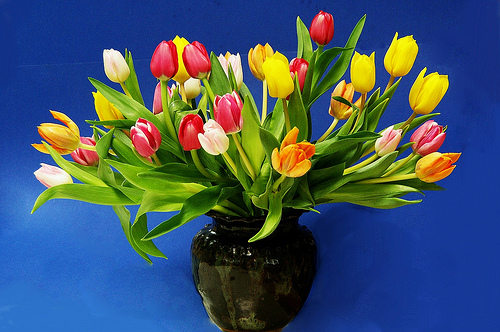

In [24]:
Image.open(str(tulips[0]))

In [25]:
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sun flowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [26]:
flower_image_dict['roses']

[PosixPath('datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3997609936_8db20b7141_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2550860627_998a4fc4c1.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505546_b242bd4928_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2675221506_5286c0595f.jpg'),
 PosixPath('datasets/flower_photos/roses/3236806990_a90c7bb520_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14597445311_8acb60247e.jpg'),
 PosixPath('datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12338444334_72fcc2fc58_m.j

In [27]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [28]:
str(flower_image_dict['roses'][0])

'datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'

In [29]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 180, 3)

In [30]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [31]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [32]:
x = np.array(X)
y = np.array(y)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [34]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

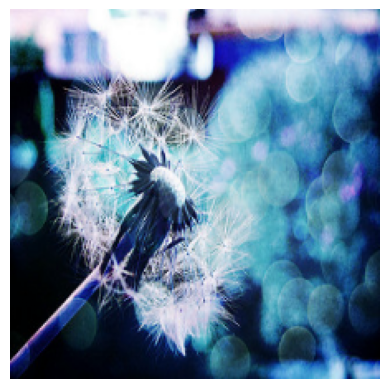

In [35]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

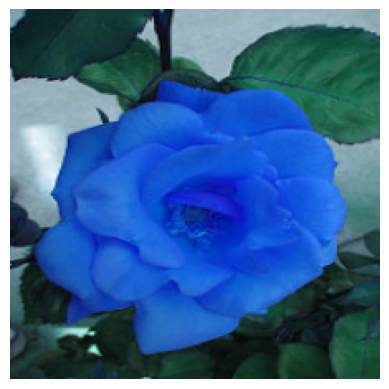

In [36]:
plt.axis('off')
plt.imshow(X[1])

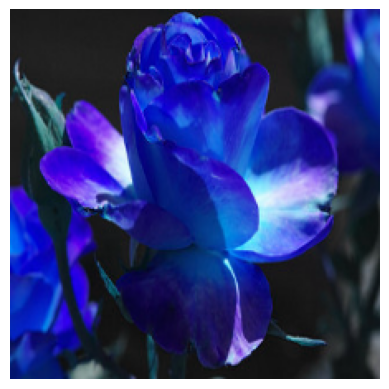

In [37]:
plt.axis('off')
plt.imshow(X[2])

In [38]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([722, 795, 795])

In [39]:
image_labels[550]

'envelope'

In [40]:
image_labels[795]

'shower curtain'

In [41]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pertrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [42]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pertrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
70/70 [==============================] - 9s 52ms/step - loss: 0.6455 - acc: 0.7572
Epoch 2/5
70/70 [==============================] - 3s 43ms/step - loss: 0.3416 - acc: 0.8784
Epoch 3/5
70/70 [==============================] - 3s 43ms/step - loss: 0.2746 - acc: 0.9031
Epoch 4/5
70/70 [==============================] - 3s 50ms/step - loss: 0.2274 - acc: 0.9250
Epoch 5/5
70/70 [==============================] - 4s 52ms/step - loss: 0.1980 - acc: 0.9354


In [44]:
model.evaluate(X_test_scaled, y_test)

24/24 [==============================] - 2s 69ms/step - loss: 0.2921 - acc: 0.8802


[0.2920757234096527, 0.8802153468132019]